In [54]:
# Actividad 4: Solución de problemas II. DAVID YAHAZIEL DÍAZ GUILLÉN 2109534 N1

In [52]:
#Cargar librerias
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
!pip install kaggle

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yahaziel23","key":"aa56c5d2a78e967ee2e14ae8a1aa362e"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 48.5MB/s]


In [10]:
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [11]:
df = pd.read_csv('data.csv')
print("Total data points",df.shape[0])
print("Total number of features(as number of columns) are ",
df.shape[1])
df.describe()

Total data points 569
Total number of features(as number of columns) are  33


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [28]:
#Cargar datos
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [31]:
#Preprocesamiento de datos.
train_data, test_data, train_labels, test_label = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
#Selección y entrenamiento del modelo.
clf = DecisionTreeClassifier()

In [34]:
#Imputer para rellenar valores faltantes
from sklearn.impute import SimpleImputer

# Creamos el imputador, que rellena los valores faltantes con la media de la columna
imputer = SimpleImputer(strategy='mean')

# Ajustamos el imputador a los datos de entrenamiento y transformamos ambos conjuntos de datos
train_data = imputer.fit_transform(train_data)
test_data = imputer.transform(test_data)

In [35]:
clf.fit(train_data, train_labels)

DecisionTreeClassifier()

In [36]:
#Prueba de modelo.
y_pred = clf.predict(test_data)

In [39]:
# Restablecemos el índice de las etiquetas de prueba
test_label = test_label.reset_index(drop=True)

In [40]:
#Predicción 1
print(y_pred[1])
print(test_label[1])

M
M


In [43]:
#Predicción 2
print(y_pred[5])
print(test_label[5])

M
M


In [44]:
#Predicción 2
print(y_pred[20])
print(test_label[20])

B
B


In [51]:
feature_names = X.columns.tolist()
class_names = y.unique().tolist()
accuracy = accuracy_score(test_label, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(test_label, y_pred, target_names=class_names))

Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           M       0.95      0.97      0.96        72
           B       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



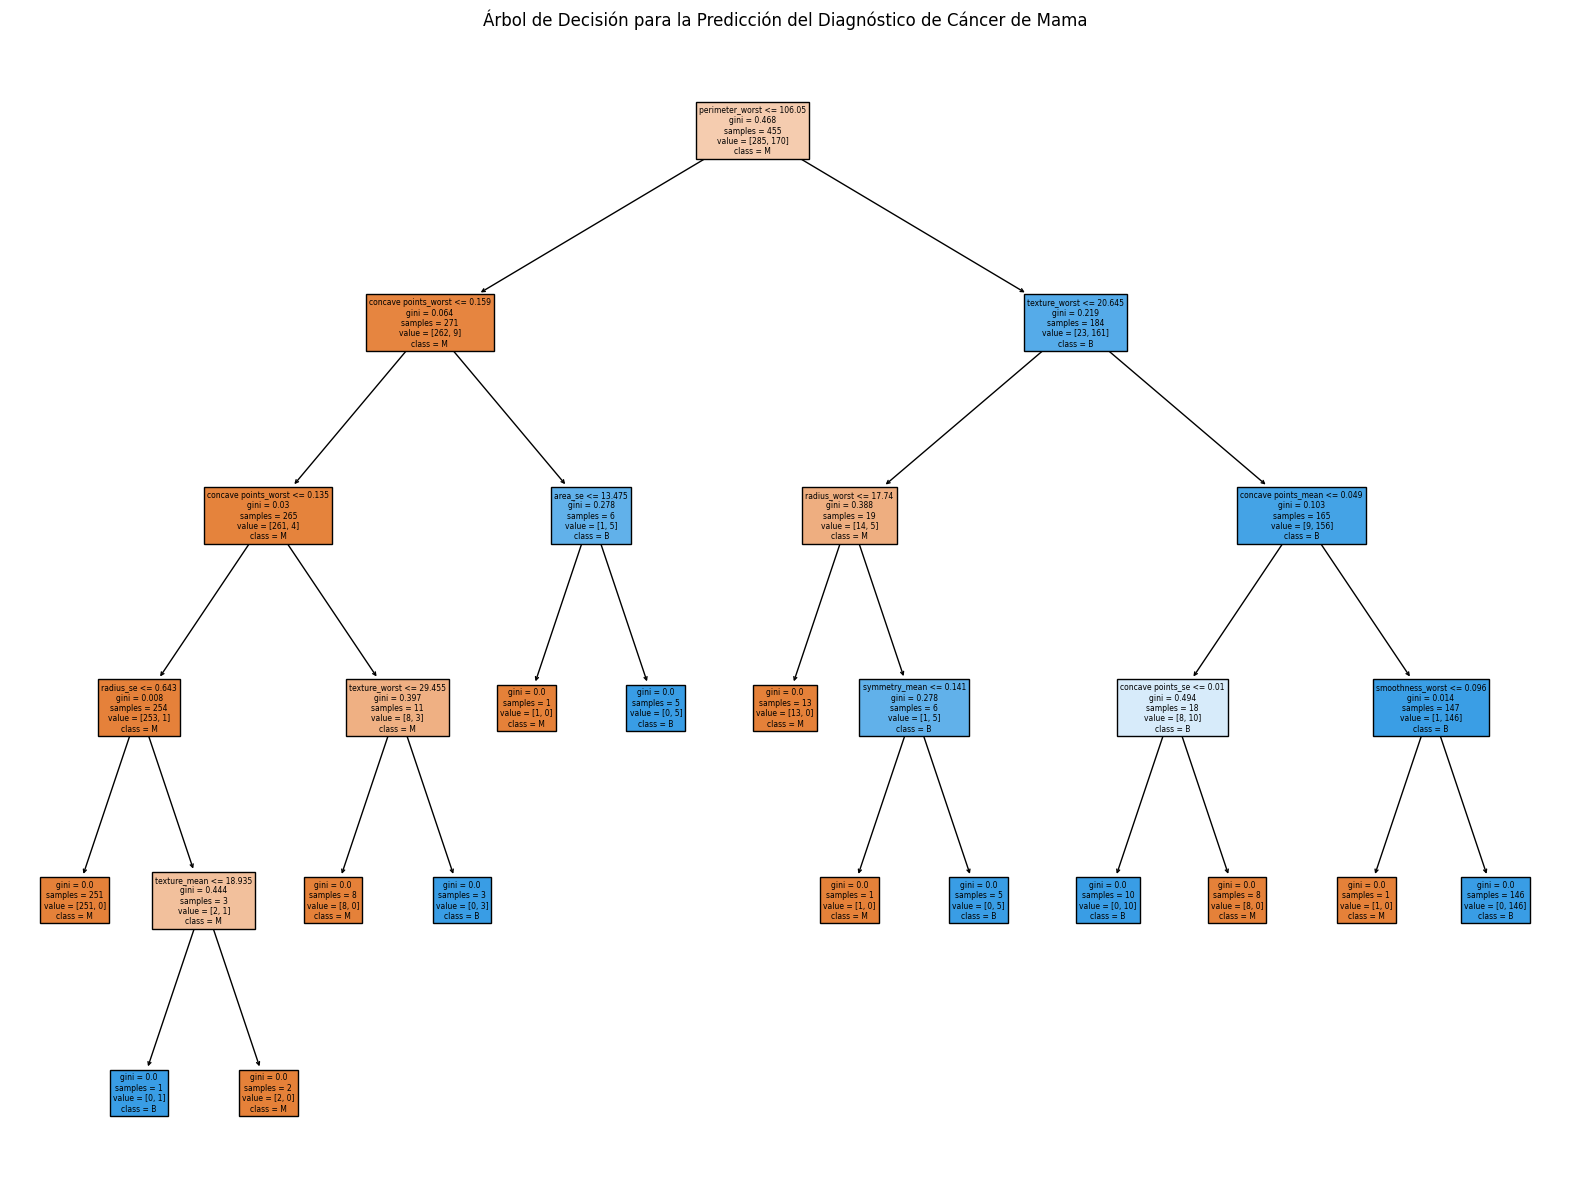

In [53]:
#             Árbol de decisión
# Creamos una figura más grande para una mejor resolución
plt.figure(figsize=(20, 15))
# Dibujamos el árbol de decisión
tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
# Añadimos un título
plt.title("Árbol de Decisión para la Predicción del Diagnóstico de Cáncer de Mama")
# Guardamos la figura con una mayor resolución
plt.savefig("arbol_de_decision.png", dpi=300)
# Mostramos la figura
plt.show()